In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('values.xlsx')
df.head()

,Company,Ticker,Year,Market Capitalization,Enterprise Value,PE Ratio,PS Ratio,PB Ratio,P/FCF Ratio,P/OCF Ratio,...,Return on Equity (ROE),Return on Assets (ROA),Return on Capital (ROIC),Earnings Yield,FCF Yield,Dividend Yield,Payout Ratio,Buyback Yield / Dilution,Total Shareholder Return,Debt Issuance
0,Amplify Energy Corp.,AMPY,2023,232.0,352,0.62,0.80,0.59,2.10,1.64,...,203.250,8.18,13.86,169.40,47.54,NaN,NaN,-1.59,-1.59,-75.0
1,Amplify Energy Corp.,AMPY,2022,338.0,539,6.11,0.83,-74.02,11.39,5.24,...,-12.678,6.16,15.56,17.13,8.78,NaN,NaN,-1.03,-1.03,-40.0
2,Amplify Energy Corp.,AMPY,2021,118.0,334,-3.68,0.35,-1.82,3.57,1.88,...,NaN,-4.57,-9.65,-27.12,28.02,NaN,NaN,-0.92,-0.92,-25.0
3,Amplify Energy Corp.,AMPY,2020,49.0,311,-0.11,0.24,-1.46,1.28,0.66,...,NaN,-43.86,-58.10,-940.67,77.92,7.63,-0.0082,-28.36,-20.73,-30.0
4,Amplify Energy Corp.,AMPY,2019,257.0,511,5.91,0.93,0.59,-9.71,5.44,...,-231.740,0.92,1.10,-13.68,-10.30,6.76,-0.4514,-17.40,-10.63,-86.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   550 non-null    object 
 1   Ticker                    550 non-null    object 
 2   Year                      550 non-null    int64  
 3   Market Capitalization     550 non-null    float64
 4   Enterprise Value          550 non-null    int64  
 5   PE Ratio                  550 non-null    float64
 6   PS Ratio                  550 non-null    float64
 7   PB Ratio                  550 non-null    float64
 8   P/FCF Ratio               550 non-null    float64
 9   P/OCF Ratio               550 non-null    float64
 10  EV/Sales Ratio            550 non-null    float64
 11  EV/EBITDA Ratio           550 non-null    float64
 12  EV/EBIT Ratio             550 non-null    float64
 13  EV/FCF Ratio              550 non-null    float64
 14  Debt / Equ

In [4]:
df.columns

Index(['Company', 'Ticker', 'Year', 'Market Capitalization',
       'Enterprise Value', 'PE Ratio', 'PS Ratio', 'PB Ratio', 'P/FCF Ratio',
       'P/OCF Ratio', 'EV/Sales Ratio', 'EV/EBITDA Ratio', 'EV/EBIT Ratio',
       'EV/FCF Ratio', 'Debt / Equity Ratio', 'Debt / EBITDA Ratio',
       'Debt / FCF Ratio', 'Quick Ratio', 'Current Ratio', 'Asset Turnover',
       'Return on Equity (ROE)', 'Return on Assets (ROA)',
       'Return on Capital (ROIC)', 'Earnings Yield', 'FCF Yield',
       'Dividend Yield', 'Payout Ratio', 'Buyback Yield / Dilution',
       'Total Shareholder Return', 'Debt Issuance'],
      dtype='object')

## Preprocessing

In [5]:
percentage_columns = ['Return on Equity (ROE)', 'Return on Assets (ROA)', 'Return on Capital (ROIC)', 
                      'Earnings Yield', 'FCF Yield', 'Dividend Yield', 'Payout Ratio', 'Buyback Yield / Dilution', 
                      'Total Shareholder Return']
monetary_columns = ['Market Capitalization', 'Enterprise Value', 'Debt Issuance']
other_columns = list(set(df.select_dtypes(include=[np.number]).columns) - set(percentage_columns) - set(monetary_columns))

def impute_group(group):
    numeric_cols = group.select_dtypes(include=[np.number]).columns

    imputer = KNNImputer(n_neighbors=2)
    group[numeric_cols] = imputer.fit_transform(group[numeric_cols])

    for col in numeric_cols:
        z_scores = (group[col] - group[col].mean()) / group[col].std()
        outliers = np.abs(z_scores) > 3
        median_value = group[col].median()
        group.loc[outliers, col] = median_value

    scaler_mon = StandardScaler()
    group[monetary_columns] = scaler_mon.fit_transform(group[monetary_columns])

    group[percentage_columns] = group[percentage_columns] / 100

    return group

# Apply the imputation and outlier removal process to each company group
df_imputed = df.groupby('Company', group_keys=False).apply(impute_group)

# Check for remaining null values
print(df_imputed.isnull().sum())

Company                     0
Ticker                      0
Year                        0
Market Capitalization       0
Enterprise Value            0
PE Ratio                    0
PS Ratio                    0
PB Ratio                    0
P/FCF Ratio                 0
P/OCF Ratio                 0
EV/Sales Ratio              0
EV/EBITDA Ratio             0
EV/EBIT Ratio               0
EV/FCF Ratio                0
Debt / Equity Ratio         0
Debt / EBITDA Ratio         0
Debt / FCF Ratio            0
Quick Ratio                 0
Current Ratio               0
Asset Turnover              0
Return on Equity (ROE)      0
Return on Assets (ROA)      0
Return on Capital (ROIC)    0
Earnings Yield              0
FCF Yield                   0
Dividend Yield              0
Payout Ratio                0
Buyback Yield / Dilution    0
Total Shareholder Return    0
Debt Issuance               0
dtype: int64


C:\Users\soory\AppData\Local\Temp\ipykernel_19432\1170233424.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df.groupby('Company', group_keys=False).apply(impute_group)


In [6]:
df_imputed.head()

,Company,Ticker,Year,Market Capitalization,Enterprise Value,PE Ratio,PS Ratio,PB Ratio,P/FCF Ratio,P/OCF Ratio,...,Return on Equity (ROE),Return on Assets (ROA),Return on Capital (ROIC),Earnings Yield,FCF Yield,Dividend Yield,Payout Ratio,Buyback Yield / Dilution,Total Shareholder Return,Debt Issuance
0,Amplify Energy Corp.,AMPY,2023.0,0.360697,-0.662297,0.62,0.80,0.59,2.10,1.64,...,2.03250,0.0818,0.1386,1.6940,0.4754,0.07195,-0.002298,-0.0159,-0.0159,-0.479340
1,Amplify Energy Corp.,AMPY,2022.0,1.103759,-0.359554,6.11,0.83,0.11,11.39,5.24,...,-0.12678,0.0616,0.1556,0.1713,0.0878,0.07195,-0.002298,-0.0103,-0.0103,-0.365843
2,Amplify Energy Corp.,AMPY,2021.0,-0.438445,-0.691438,-3.68,0.35,-1.82,3.57,1.88,...,0.97490,-0.0457,-0.0965,-0.2712,0.2802,0.07195,-0.002298,-0.0092,-0.0092,-0.317201
3,Amplify Energy Corp.,AMPY,2020.0,-0.922136,-0.728674,-0.11,0.24,-1.46,1.28,0.66,...,-1.24630,-0.4386,-0.5810,-9.4067,0.7792,0.07630,-0.000082,-0.2836,-0.2073,-0.333415
4,Amplify Energy Corp.,AMPY,2019.0,0.535948,-0.404884,5.91,0.93,0.59,-9.71,5.44,...,-2.31740,0.0092,0.0110,-0.1368,-0.1030,0.06760,-0.004514,-0.1740,-0.1063,-0.515010


In [7]:
df1 = pd.DataFrame()
columns = ['Debt / Equity Ratio','Debt / EBITDA Ratio','Debt / FCF Ratio', 'Quick Ratio', 'Current Ratio', 'Total Shareholder Return', 'Earnings Yield','FCF Yield', 'Payout Ratio']
for i in range(len(columns)):
   df1 = pd.concat([df1,df_imputed[columns[i]]],axis=1)

In [8]:
df1.head()

,Debt / Equity Ratio,Debt / EBITDA Ratio,Debt / FCF Ratio,Quick Ratio,Current Ratio,Total Shareholder Return,Earnings Yield,FCF Yield,Payout Ratio
0,0.31,0.98,1.11,0.62,1.02,-0.0159,1.6940,0.4754,-0.002298
1,-43.37,2.33,6.67,0.58,0.71,-0.0103,0.1713,0.0878,-0.002298
2,-3.60,20.18,7.04,0.67,0.76,-0.0092,-0.2712,0.2802,-0.002298
3,-7.80,2.96,6.84,0.73,1.00,-0.2073,-9.4067,0.7792,-0.000082
4,0.67,3.45,-10.92,0.54,0.66,-0.1063,-0.1368,-0.1030,-0.004514


In [9]:
default = []
# Iterate over rows and assess each value
for index, row in df1.iterrows():
    # print(f"Row {index + 1}:")
    check = 0
    for column, value in row.items():
        # print(f"    {column}: {value}")
        # print(value)
        if column == columns[0]:
            if value > 2:
                check += 1
        elif column == columns[1]:
            if value > 3:
                check += 1
        elif column == columns[2]:     
            if value > 1:
                check += 1
        elif column == columns[3]:
            if value < 1:
                check += 1
        elif column == columns[4]:
            if value < 1:
                check += 1
        elif column == columns[5]:
            if value < 3:
                check += 1
        elif column == columns[6]:
            if value < 0:
                check += 1
        elif column == columns[7]:
            if value < 0:
                check += 1
        elif column == columns[8]:
            if value > 0.6:
                check += 1
        # print(check)
    if check > 4: 
        default.append(1)
    elif check <= 4:
        default.append(0)
print(default)

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

In [10]:
Counter(default)

Counter({0: 362, 1: 188})

In [11]:
df_imputed['Default'] = default

percentage_columns = ['Return on Equity (ROE)', 'Return on Assets (ROA)', 'Return on Capital (ROIC)', 
                      'Earnings Yield', 'FCF Yield', 'Dividend Yield', 'Payout Ratio', 'Buyback Yield / Dilution', 
                      'Total Shareholder Return']
monetary_columns = ['Market Capitalization', 'Enterprise Value']
other_columns = list(set(df.select_dtypes(include=[np.number]).columns) - set(percentage_columns) - set(monetary_columns))

other_columns.remove('Year')

def impute_group(group):
    # Standardize other columns
    scaler_other = StandardScaler()
    group[other_columns] = scaler_other.fit_transform(group[other_columns])
    
    return group

df_imputed = df_imputed.groupby('Company', group_keys=False).apply(impute_group)

C:\Users\soory\AppData\Local\Temp\ipykernel_19432\865007197.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_imputed.groupby('Company', group_keys=False).apply(impute_group)


In [12]:
df_imputed.columns

Index(['Company', 'Ticker', 'Year', 'Market Capitalization',
       'Enterprise Value', 'PE Ratio', 'PS Ratio', 'PB Ratio', 'P/FCF Ratio',
       'P/OCF Ratio', 'EV/Sales Ratio', 'EV/EBITDA Ratio', 'EV/EBIT Ratio',
       'EV/FCF Ratio', 'Debt / Equity Ratio', 'Debt / EBITDA Ratio',
       'Debt / FCF Ratio', 'Quick Ratio', 'Current Ratio', 'Asset Turnover',
       'Return on Equity (ROE)', 'Return on Assets (ROA)',
       'Return on Capital (ROIC)', 'Earnings Yield', 'FCF Yield',
       'Dividend Yield', 'Payout Ratio', 'Buyback Yield / Dilution',
       'Total Shareholder Return', 'Debt Issuance', 'Default'],
      dtype='object')

## Data Visualization

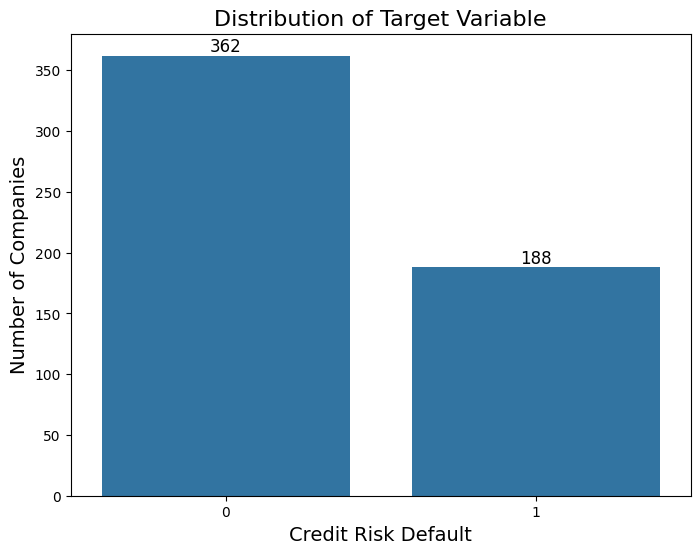

In [13]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Default', data=df_imputed)

# Set axis labels
ax.set_xlabel('Credit Risk Default', fontsize=14)
ax.set_ylabel('Number of Companies', fontsize=14)
ax.set_title('Distribution of Target Variable', fontsize=16)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12)

plt.show()

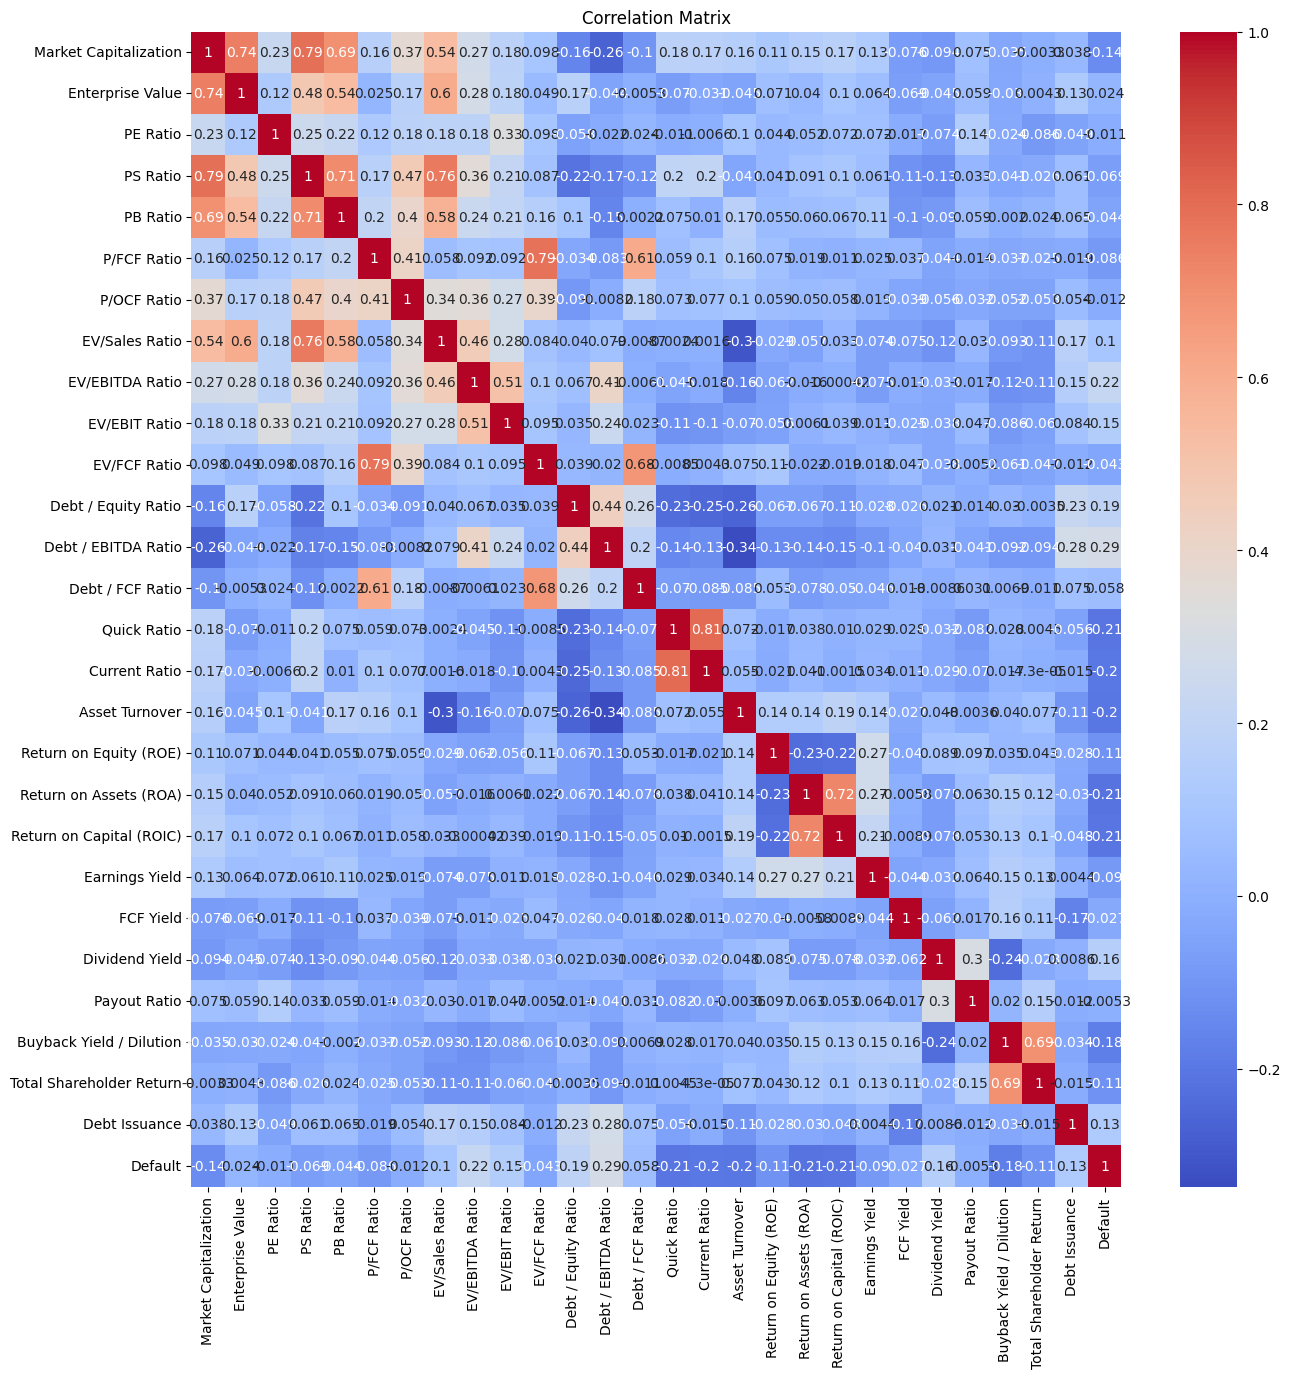

In [14]:
df_visual = df_imputed.iloc[:,3:]
correlation_matrix = df_visual.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
threshold = 0.8
high_correlation = correlation_matrix.abs() > threshold

highly_correlated_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]) 
                           for i in range(len(correlation_matrix.columns)) 
                           for j in range(i) 
                           if abs(correlation_matrix.iloc[i, j]) > threshold]

print(highly_correlated_pairs)

[('Current Ratio', 'Quick Ratio', 0.8068851654818093)]


## Save the final Dataset

In [17]:
# Save the DataFrame to an Excel file
excel_filename = 'values_final.xlsx'
df_imputed.to_excel(excel_filename, index=False)
print(f"DataFrame has been saved to {excel_filename}")

DataFrame has been saved to values_final.xlsx
